### Practical Exercise on LInear Regression

We perform a linear regression on a dataset to predict price of used cars based on  ertain features 
like year, engine, etc

In [1]:
#import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv('car_sets.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data_1 = data.drop(['Model'], axis=1)
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
data_1.shape

(4345, 8)

In [6]:
data_1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_2 = data_1.dropna(axis=0)
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


/var/folders/2b/nq5lm3z15bn1ww6_zdrgv57h0000gn/T/ipykernel_44770/2873750558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Price'])


<Axes: xlabel='Price', ylabel='Density'>

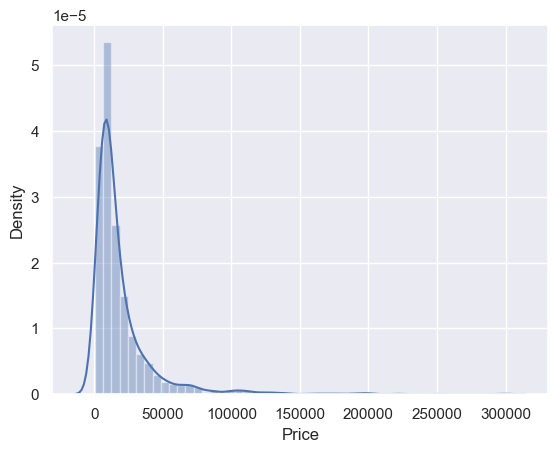

In [8]:
#check through the individual variables to determin their PDF - Probability Distribution Functions

sns.distplot(data_2['Price'])

This shows that there are outlier in the variable.

An outlier is a value that is so far removed from the mean

In [9]:
q = data_2['Price'].quantile(0.99)
data_3 = data_1[data_1['Price'] < q]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4132,4132.00000,4132,4132.000000,3984.000000,4132,4132,4132.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,908,NaN,1598,NaN,NaN,1895,3738,NaN
mean,NaN,17763.66577,NaN,165.582527,2.743770,NaN,NaN,2006.283640
std,NaN,18939.71448,NaN,104.232463,4.956057,NaN,NaN,6.664444
min,NaN,600.00000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.00000,NaN,93.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11300.00000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.00000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/var/folders/2b/nq5lm3z15bn1ww6_zdrgv57h0000gn/T/ipykernel_44770/4054119486.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Price'])


<Axes: xlabel='Price', ylabel='Density'>

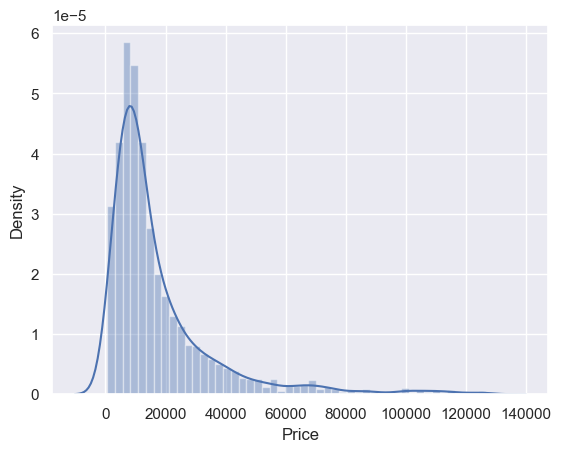

In [10]:
sns.distplot(data_3['Price'])

/var/folders/2b/nq5lm3z15bn1ww6_zdrgv57h0000gn/T/ipykernel_44770/4147772230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

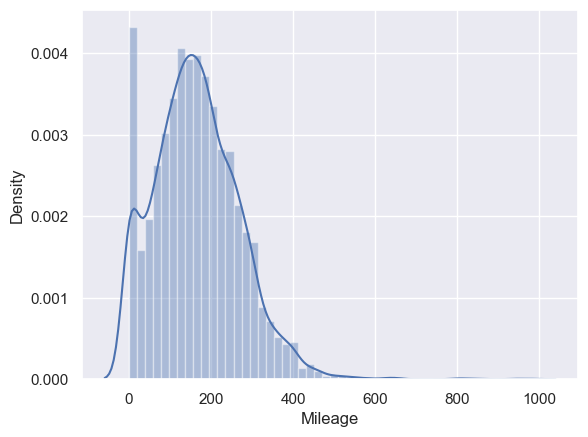

In [11]:
sns.distplot(data_3['Mileage'])

In [12]:
q = data_3['Mileage'].quantile(0.90)
data_4 = data_3[data_3['Mileage']<q]

/var/folders/2b/nq5lm3z15bn1ww6_zdrgv57h0000gn/T/ipykernel_44770/1626039209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

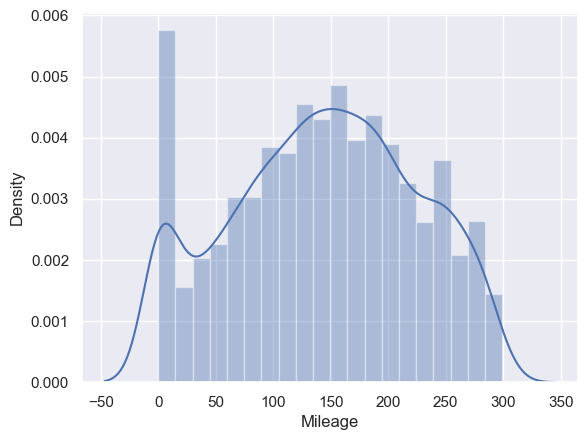

In [13]:
sns.distplot(data_4['Mileage'])

In [14]:
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3718,3718.000000,3718,3718.000000,3589.000000,3718,3718,3718.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,823,NaN,1367,NaN,NaN,1687,3397,NaN
mean,NaN,19053.211635,NaN,143.561054,2.719457,NaN,NaN,2007.283217
std,NaN,19462.059594,NaN,80.380444,4.674645,NaN,NaN,5.991986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7800.000000,NaN,85.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,12399.500000,NaN,147.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22900.000000,NaN,201.000000,3.000000,NaN,NaN,2012.000000


/var/folders/2b/nq5lm3z15bn1ww6_zdrgv57h0000gn/T/ipykernel_44770/476904083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

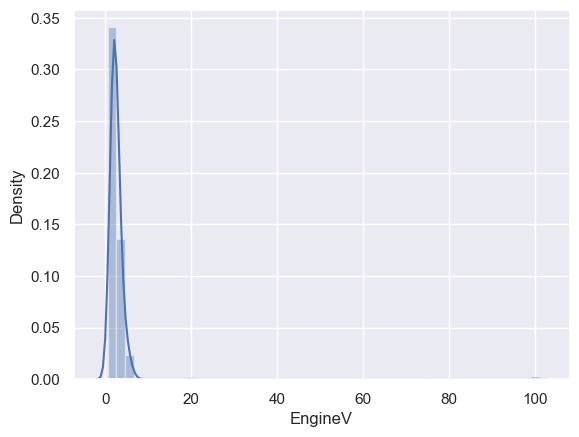

In [15]:
sns.distplot(data_4['EngineV'])

/var/folders/2b/nq5lm3z15bn1ww6_zdrgv57h0000gn/T/ipykernel_44770/2844088999.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_5['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

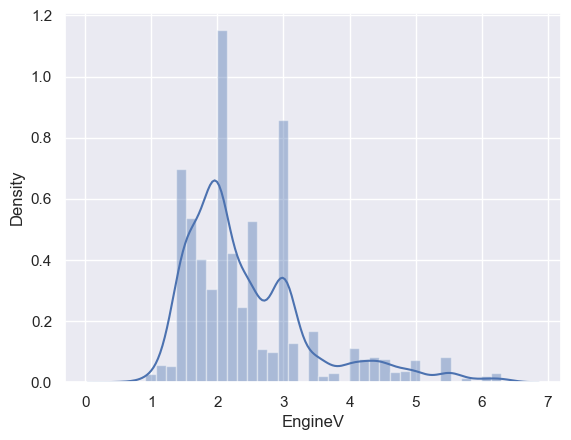

In [16]:
data_5 = data_4[data_4['EngineV'] < 6.5]
sns.distplot(data_5['EngineV'])

/var/folders/2b/nq5lm3z15bn1ww6_zdrgv57h0000gn/T/ipykernel_44770/586608739.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_5['Year'])


<Axes: xlabel='Year', ylabel='Density'>

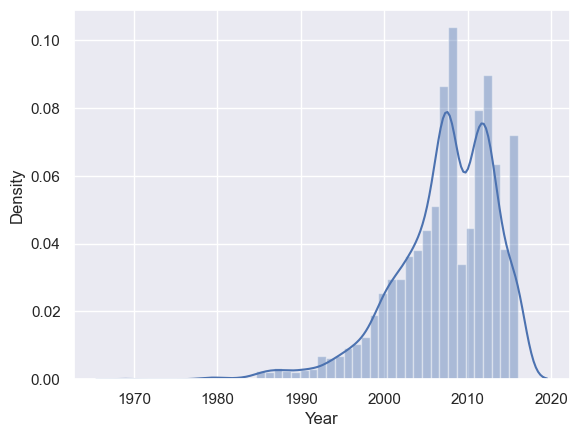

In [17]:
sns.distplot(data_5['Year'])

In [18]:
q = data_5['Year'].quantile(0.05)
data_6 = data_5[data_5['Year'] > q]

/var/folders/2b/nq5lm3z15bn1ww6_zdrgv57h0000gn/T/ipykernel_44770/3346636200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_6['Year'])


<Axes: xlabel='Year', ylabel='Density'>

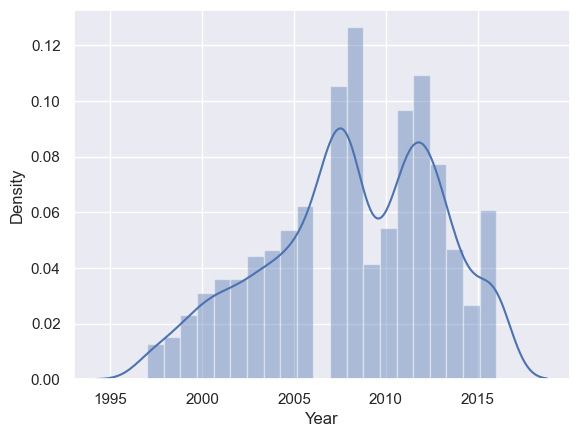

In [19]:
sns.distplot(data_6['Year'])

In [20]:
data_6.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3382,3382.000000,3382,3382.000000,3382.000000,3382,3382,3382.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,738,NaN,1184,NaN,NaN,1612,3108,NaN
mean,NaN,20032.804556,NaN,140.942342,2.462771,NaN,NaN,2008.187167
std,NaN,19694.919313,NaN,78.773998,0.976718,NaN,NaN,4.690369
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1997.000000
25%,NaN,8500.000000,NaN,83.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12925.000000,NaN,144.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23900.000000,NaN,200.000000,3.000000,NaN,NaN,2012.000000


In [21]:
data_cleaned = data_6.reset_index(drop=True)

In [22]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3382,3382.000000,3382,3382.000000,3382.000000,3382,3382,3382.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,738,NaN,1184,NaN,NaN,1612,3108,NaN
mean,NaN,20032.804556,NaN,140.942342,2.462771,NaN,NaN,2008.187167
std,NaN,19694.919313,NaN,78.773998,0.976718,NaN,NaN,4.690369
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1997.000000
25%,NaN,8500.000000,NaN,83.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12925.000000,NaN,144.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23900.000000,NaN,200.000000,3.000000,NaN,NaN,2012.000000


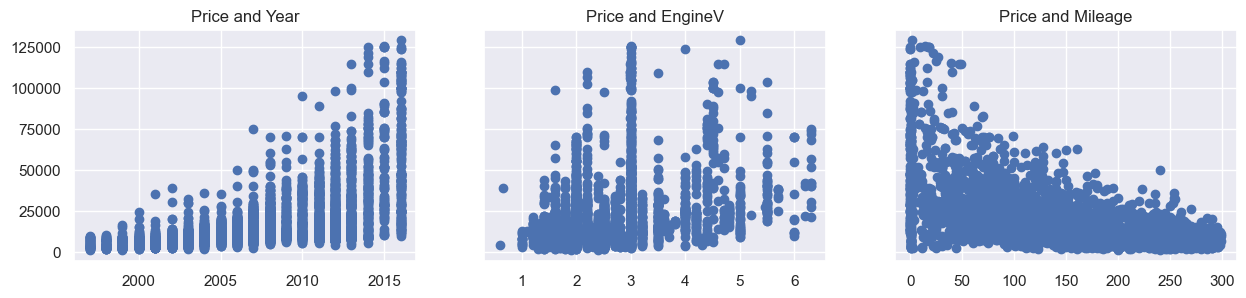

In [28]:
#Checking the OLS Assumptions

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [30]:
#Perform log transformation of the Price Variable

log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned.head(20)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
1,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
2,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
3,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209
4,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,7.244228
5,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011,9.388487
6,Audi,9500.0,vagon,165,2.7,Gas,yes,2003,9.159047
7,Volkswagen,10500.0,sedan,100,1.8,Petrol,yes,2008,9.259131
8,Toyota,16000.0,crossover,250,4.7,Gas,yes,2001,9.680344
9,Renault,8600.0,hatch,84,1.5,Diesel,yes,2012,9.059517


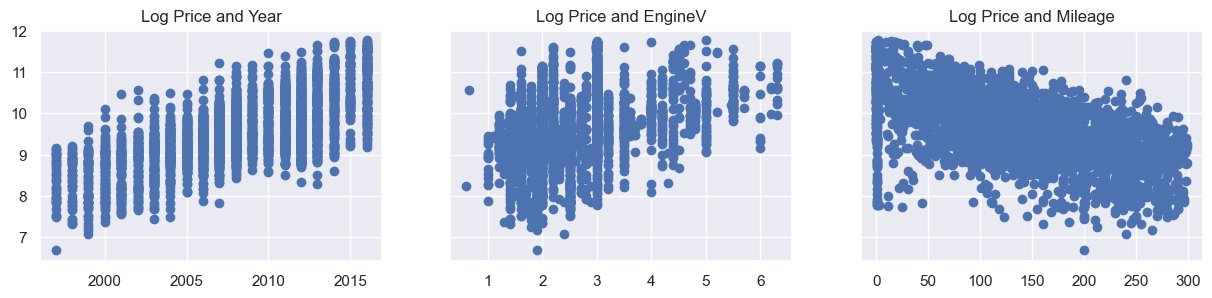

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Log Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log Price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [34]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)


KeyError: "['Price'] not found in axis"

In [35]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
1,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
2,Audi,vagon,200,2.7,Diesel,yes,2006,9.560997
3,Renault,vagon,193,1.5,Diesel,yes,2012,9.287209
4,Volkswagen,other,212,1.8,Gas,no,1999,7.244228


In [36]:
#Check for multicolilearity

data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log Price'], dtype=object)

In [40]:
#We will use variance inflation factor from statsmodel to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [41]:
vif

,VIF,Features
0,4.178261,Mileage
1,10.374539,Year
2,7.354782,EngineV
